# This notebook is only a scrap paper
# Dieses Notebook ist nur ein Schmierblatt

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_palette('mako')

In [118]:
data = pd.read_csv('dataset.csv')
df = pd.DataFrame(data)

In [119]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [120]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [121]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [123]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Junior',
    'EX': 'Executive',
    'MI': 'Mid Level',
})

In [124]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,Senior,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,Senior,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,Senior,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,Senior,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,Senior,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [125]:
data.shape

(16534, 11)

In [126]:
duplic = data[data.duplicated()]
duplic.shape

(6421, 11)

In [127]:
duplic

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
62,2024,Senior,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
151,2024,Senior,FT,Research Analyst,130000,USD,130000,US,0,US,M
238,2024,Mid Level,FT,Data Analyst,95000,USD,95000,US,0,US,M
239,2024,Mid Level,FT,Data Analyst,80000,USD,80000,US,0,US,M
247,2024,Senior,FT,Data Scientist,146000,USD,146000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16235,2022,Mid Level,FT,Data Scientist,78000,USD,78000,US,100,US,M
16236,2022,Senior,FT,Data Engineer,135000,USD,135000,US,100,US,M
16237,2022,Senior,FT,Data Engineer,115000,USD,115000,US,100,US,M
16376,2021,Mid Level,FT,Data Engineer,200000,USD,200000,US,100,US,L


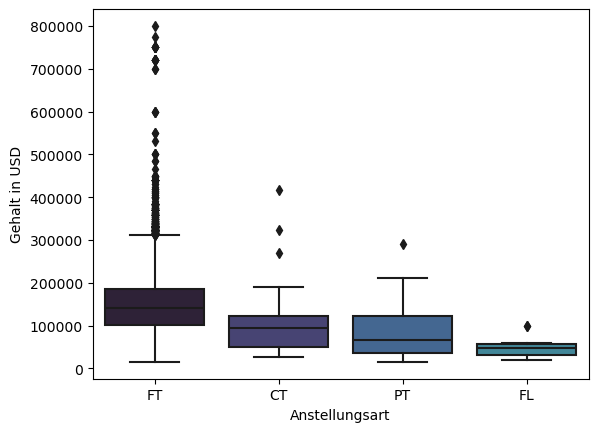

In [153]:
sns.boxplot(data, x= 'employment_type', y= 'salary_in_usd')
plt.xlabel('Anstellungsart')
plt.ylabel('Gehalt in USD')
plt.show()

In [129]:
def job_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer",
                        "BI Data Analyst", "Business Data Analyst", "BI Developer",
                        "BI Analyst", "Business Intelligence Engineer",
                        "BI Data Engineer", "Power BI Developer"]
    
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist",
                        "3D Computer Vision Researcher", "Deep Learning Researcher",
                        "AI/Computer Vision Engineer"]
    
    machine_learning = ["Machine Learning Engineer", "ML Engineer",
                        "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    
    management = ["Data Science Manager", "Director of Data Science",
                  "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning",
                  "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"
    
    
    
data['job_category'] = data['job_title'].apply(job_category)



In [130]:
data['job_category'].describe()

count                16534
unique                   6
top       Data Engineering
freq                  6759
Name: job_category, dtype: object

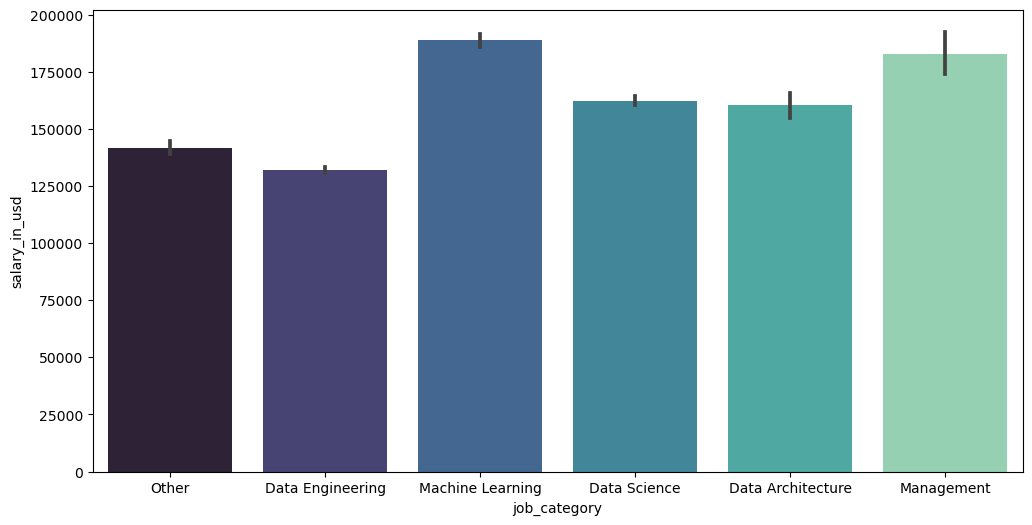

In [154]:
plt.figure(figsize= (12,6))
sns.barplot(data, x= 'job_category', y= 'salary_in_usd')
plt.show()

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

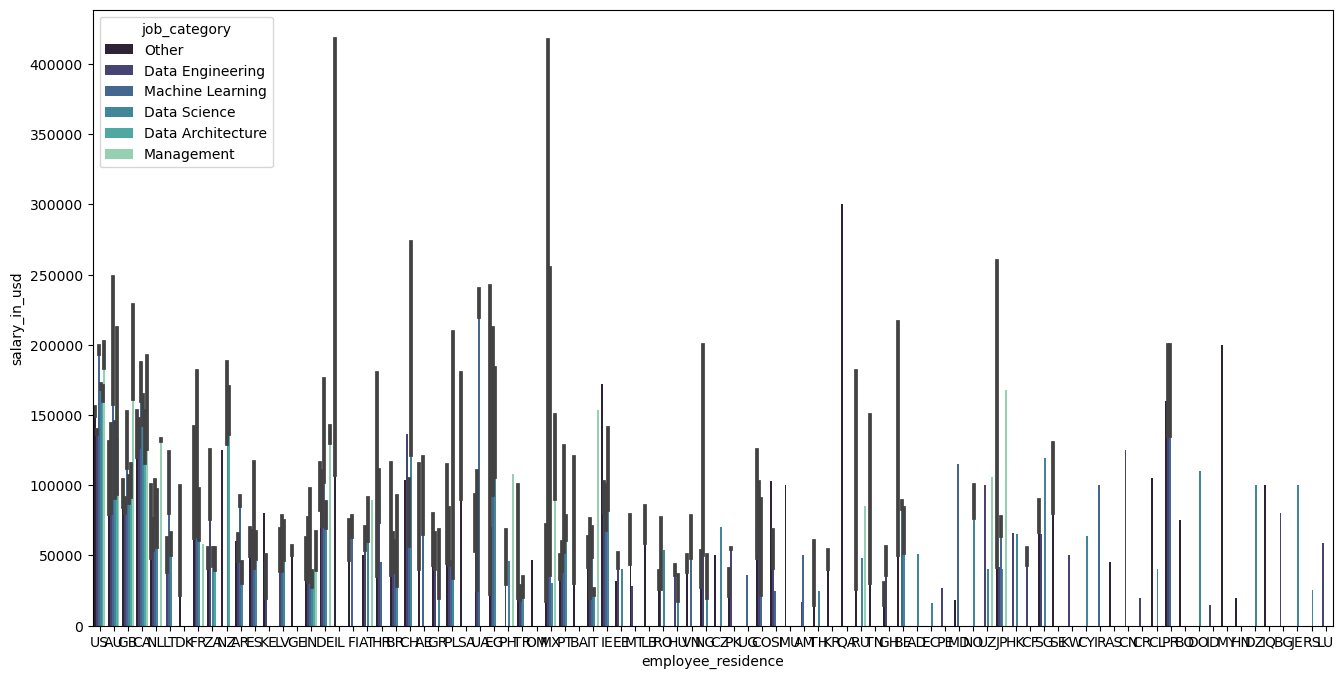

In [155]:
plt.figure(figsize= (16,8))
sns.barplot(data, x= 'employee_residence', y= 'salary_in_usd', hue= 'job_category')

In [133]:
data['employee_residence'].unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [134]:
import pycountry as pyc

In [135]:
def country_code_to_name1(country_code):
    try:
        return pyc.countries.get(alpha_2=country_code).name
    except:
        return country_code
    
def country_code_to_name2(code):
    try:
        country = pyc.countries.get(alpha_2=code)
        return country.name
    except:
        return None

In [136]:
data['employee_residence'].apply(country_code_to_name2).unique()

array(['United States', 'Australia', 'United Kingdom', 'Canada',
       'Netherlands', 'Lithuania', 'Denmark', 'France', 'South Africa',
       'New Zealand', 'Argentina', 'Spain', 'Kenya', 'Latvia', 'Georgia',
       'India', 'Germany', 'Israel', 'Finland', 'Austria', 'Croatia',
       'Brazil', 'Switzerland', 'United Arab Emirates', 'Greece',
       'Poland', 'Saudi Arabia', 'Ukraine', 'Egypt', 'Philippines',
       'Türkiye', 'Oman', 'Mexico', 'Portugal', 'Bosnia and Herzegovina',
       'Italy', 'Ireland', 'Estonia', 'Malta', 'Lebanon', 'Romania',
       'Hungary', 'Viet Nam', 'Nigeria', 'Czechia', 'Pakistan', 'Uganda',
       'Colombia', 'Slovenia', 'Mauritius', 'Armenia', 'Thailand',
       'Korea, Republic of', 'Qatar', 'Russian Federation', 'Tunisia',
       'Ghana', 'Belgium', 'Andorra', 'Ecuador', 'Peru',
       'Moldova, Republic of', 'Norway', 'Uzbekistan', 'Japan',
       'Hong Kong', 'Central African Republic', 'Singapore', 'Sweden',
       'Kuwait', 'Cyprus', 'Iran, Isla

In [137]:
data['employee_residence'].unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [138]:
def emp_residence(emp_res):

    north_america = ['United States', 'Canada', 'Mexico']

    central_america = ['Honduras', 'Costa Rica', 'Puerto Rico', 'Dominican Republic']

    south_america = ['Ecuador', 'Peru', 'Colombia', 'Bolivia, Plurinational State of', 'Brazil', 'Chile', 'Argentina']

    europe = ['Austria', 'Spain', 'France', 'Italy', 'Moldova, Republic of', 
              'Netherlands', 'Estonia', 'Hungary', 'Norway', 'Denmark',
              'Lithuania', 'Latvia', 'Germany', 'Finland', 'Croatia',
              'Switzerland', 'Greece', 'Poland', 'Ukraine', 'Portugal',
              'Bosnia and Herzegovina', 'Ireland', 'Malta', 'Romania',
              'Czechia', 'Slovenia', 'Belgium', 'Andorra', 'Sweden',
              'Bulgaria', 'Serbia', 'Luxembourg', 'United Kingdom']
    
    middle_east = ['Georgia', 'Israel', 'United Arab Emirates',
                   'Saudi Arabia', 'Türkiye', 'Oman', 'Lebanon',
                   'Pakistan', 'Armenia', 'Qatar', 'Uzbekistan',
                   'Kuwait', 'Cyprus', 'Iran, Islamic Republic of',
                   'Iraq']
    
    asia = ['India', 'Philippines', 'Viet Nam', 'Thailand',
            'Korea, Republic of', 'Japan', 'Singapore', 'China',
            'Indonesia', 'Malaysia']
    
    africa = ['South Africa', 'Kenya', 'Egypt', 'Nigeria', 'Uganda',
              'Mauritius', 'Tunisia', 'Ghana', 'Central African Republic',
              'Algeria', 'Morocco']
    
    oceania = ['Australia', 'New Zealand', 'American Samoa']

    if emp_res in north_america:
        return 'North America'
    elif emp_res in central_america:
        return 'Central America'
    elif emp_res in south_america:
        return 'South America'
    elif emp_res in europe:
        return 'Europe'
    elif emp_res in middle_east:
        return 'Middle East'
    elif emp_res in asia:
        return 'Asia'
    elif emp_res in africa:
        return 'Africa'
    elif emp_res in oceania:
        return 'Oceania'
    else:
        return 'Other'

In [139]:
data['residence'] = data['employee_residence'].apply(country_code_to_name1)

In [140]:
avg = data.groupby('company_location')['salary_in_usd'].mean()

In [141]:
avg

company_location
AD     50745.000000
AE     86000.000000
AM     50000.000000
AR     62444.444444
AS     31684.333333
          ...      
TR     23094.666667
UA    105600.000000
US    156904.423130
VN     63000.000000
ZA     53488.684211
Name: salary_in_usd, Length: 77, dtype: float64

In [142]:
data['residence']

0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
16529    United States
16530    United States
16531    United States
16532    United States
16533            India
Name: residence, Length: 16534, dtype: object

In [143]:
data['continent'] = data['residence'].apply(emp_residence)

In [144]:
data['continent']

0        North America
1        North America
2        North America
3        North America
4        North America
             ...      
16529    North America
16530    North America
16531    North America
16532    North America
16533             Asia
Name: continent, Length: 16534, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<Axes: xlabel='salary_in_usd', ylabel='continent'>

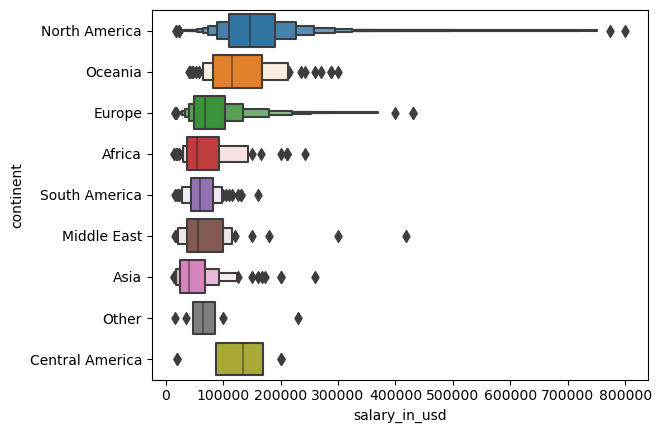

In [145]:

sns.boxenplot(data, x= 'salary_in_usd', y= data['continent'])

In [146]:
kategoriale_col = ['experience_level', 'employment_type', 'job_title', '']

In [147]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_category',
       'residence', 'continent'],
      dtype='object')

In [148]:
import pycountry as pyc

def country_con(code):
    """
    Konvertiert einen ISO 3166-1 Alpha-2 oder Alpha-3 Ländercode in den entsprechenden Ländernamen.
    
    Args:
        code (str): Der ISO 3166-1 Alpha-2 oder Alpha-3 Ländercode.
        
    Returns:
        str: Der entsprechende Ländername oder eine Fehlermeldung, wenn der Code ungültig ist.
    """
    try:
        country = pyc.countries.get(alpha_2=code.upper()) or pyc.countries.get(alpha_3=code.upper())
        if country:
            return country.name
        else:
            return f"Ungültiger Ländercode: {code}"
    except Exception as e:
        return str(e)

In [149]:
numbers = [1, 2, 3, 4, 5, 3, 2, 6, 1, 7] 
print(sorted(set(x for x in numbers if numbers.count(x) > 1)))

[1, 2, 3]


In [150]:
data['job_title'].unique()

array(['AI Engineer', 'Data Engineer', 'Machine Learning Engineer',
       'ML Engineer', 'Data Analyst', 'NLP Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Manager', 'Data Architect',
       'Data Operations Manager', 'Research Scientist',
       'Data Science Manager', 'Business Intelligence Engineer',
       'Business Intelligence', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Science', 'Data Specialist',
       'Business Intelligence Lead', 'Research Analyst',
       'Business Intelligence Analyst', 'AI Software Engineer',
       'Machine Learning Scientist', 'Data Science Engineer',
       'Machine Learning Operations Engineer', 'Analytics Engineer',
       'Data Management Analyst',
       'Encounter Data Management Professional',
       'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead',
       'Research Engineer', 'AI Scientist',
       'Business Intelligence Develope

In [151]:
data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer",
                        "BI Data Analyst", "Business Data Analyst", "BI Developer",
                        "BI Analyst", "Business Intelligence Engineer",
                        "BI Data Engineer", "Power BI Developer"]
    
data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist",
                    "3D Computer Vision Researcher", "Deep Learning Researcher",
                    "AI/Computer Vision Engineer"]

machine_learning = ["Machine Learning Engineer", "ML Engineer",
                    "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]

data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]

management = ["Data Science Manager", "Director of Data Science",
                "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning",
                "Manager Data Management", "Data Analytics Manager"]

In [158]:
data_coordinates = pd.read_csv('dataset_with_coordinates.csv')
data_coordinates.drop(['salary', 'salary_currency'], axis= 1, inplace= True)

In [159]:
data_coordinates.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_latitude,employee_residence_longitude,company_location_latitude,company_location_longitude
0,2024,SE,FT,AI Engineer,202730,US,0,US,M,37.0902,-95.7129,37.0902,-95.7129
1,2024,SE,FT,AI Engineer,92118,US,0,US,M,37.0902,-95.7129,37.0902,-95.7129
2,2024,SE,FT,Data Engineer,130500,US,0,US,M,37.0902,-95.7129,37.0902,-95.7129
3,2024,SE,FT,Data Engineer,96000,US,0,US,M,37.0902,-95.7129,37.0902,-95.7129
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M,37.0902,-95.7129,37.0902,-95.7129
